<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analysis/blob/main/Car%20Sales%20Analysis/Car_Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application and use cases
1. Market Analysis:
Evaluate overall trends and regional variations in car sales to assess manufacturer performance, model preferences, and demographic insights.
2. Seasonal Patterns and Competitor Analysis:
Investigate seasonal and cyclical patterns in sales.
3. Forecasting and Predictive Analysis
Use historical data for forecasting and predict future market trends.
Support marketing, advertising, and investment decisions based on insights.
4. Supply Chain and Inventory Optimization:
Provide valuable data for stakeholders in the automotive industry.

Aplikasi dan kasus penggunaan
1. Analisis Pasar: Mengevaluasi tren keseluruhan dan variasi regional dalam penjualan mobil untuk menilai kinerja pabrikan, preferensi model, dan wawasan demografis.
2. Pola Musiman dan Analisis Pesaing: Selidiki pola musiman dan siklus dalam penjualan.
3. Peramalan dan Analisis Prediktif Gunakan data historis untuk memperkirakan dan memprediksi tren pasar di masa depan. Mendukung keputusan pemasaran, periklanan, dan investasi berdasarkan wawasan.
4. Optimalisasi Rantai Pasokan dan Inventaris: Menyediakan data berharga bagi para pemangku kepentingan di industri otomotif.

source : https://www.kaggle.com/datasets/missionjee/car-sales-report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount ('/content/gdrive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Cleaning

In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car Sales_Dataset/Car_Sales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
df.shape

(23906, 16)

### Remove Columns

In [4]:
df.drop(columns=(['Car_id','Phone', 'Customer Name']), inplace=True)
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


In [5]:
df.isna().sum()

Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Dealer_Region    0
dtype: int64

### Duplicated Check

In [6]:
df.duplicated().sum()

0

### Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Dealer_No      23906 non-null  object
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

### Outliers

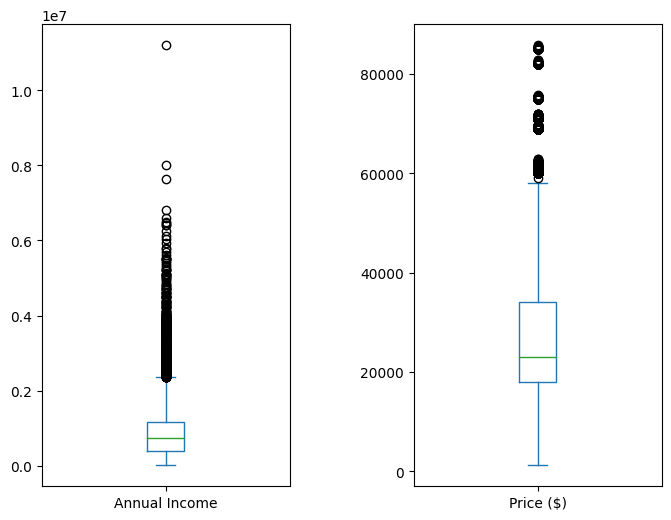

In [9]:
df.select_dtypes(include=['int','float']).plot(subplots=True, layout=(1,2), kind='box', figsize=(8,6))
plt.subplots_adjust(wspace=0.5)

### Data Distribution

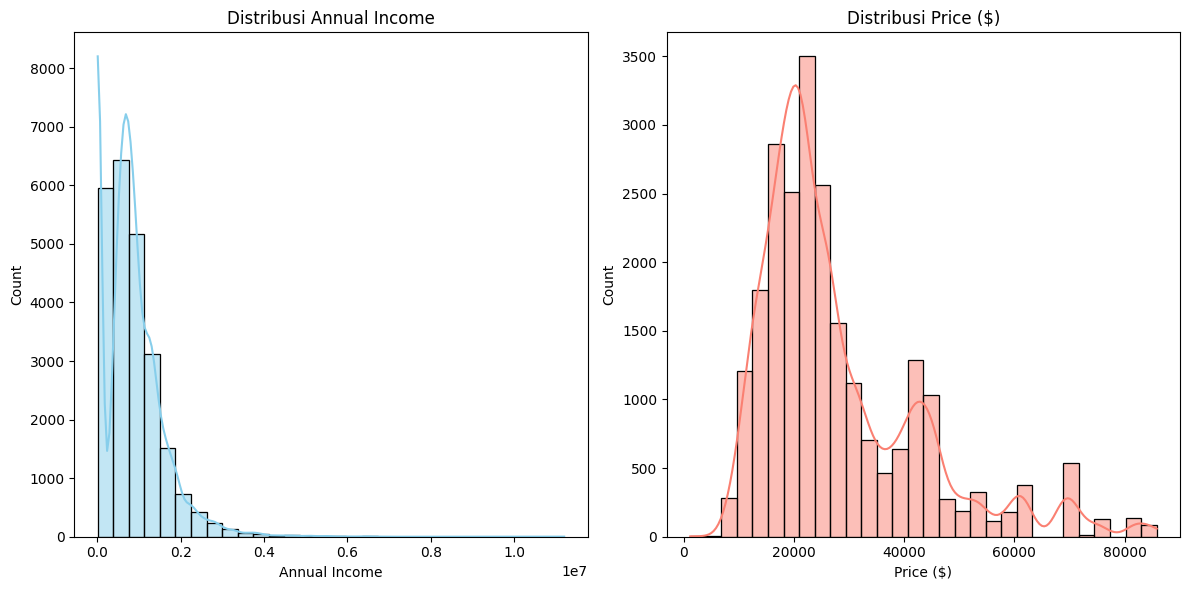

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Price ($)'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Price ($)')

plt.tight_layout()
plt.show()

## Market Analysis

In [11]:
df.head(2)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora


### Transactions by Dealer Region

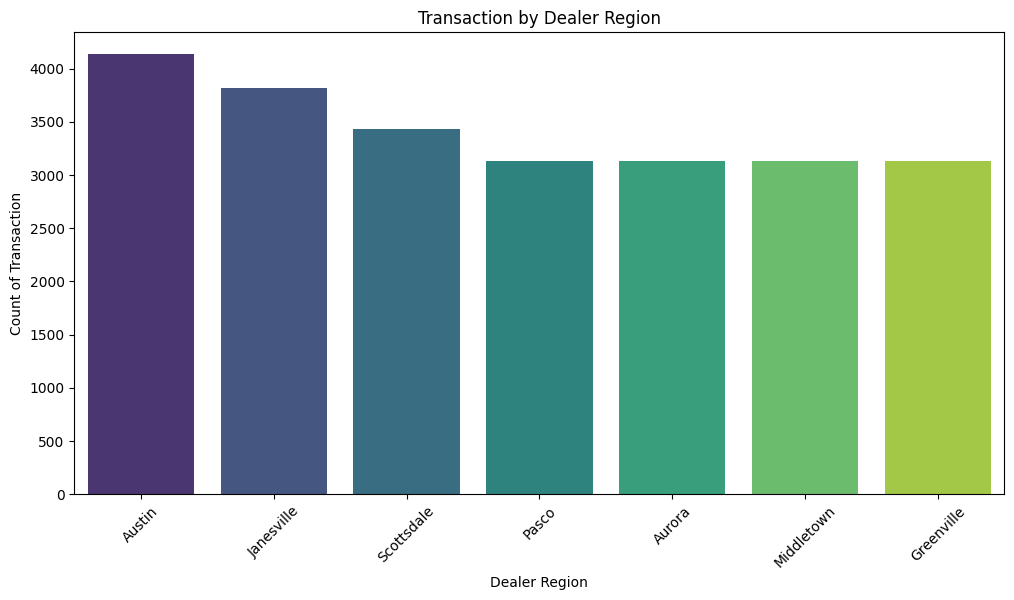

In [12]:
transaction_counts = df['Dealer_Region'].value_counts().reset_index()
transaction_counts.columns = ['Dealer_Region', 'Transaction_Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=transaction_counts, x='Dealer_Region', y='Transaction_Count', palette='viridis')
plt.title('Transaction by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Count of Transaction')
plt.xticks(rotation=45)
plt.show()

### Consumen Preference by Dealer Region

In [13]:
from scipy import stats  # Pastikan ini diimpor
variables = ['Model', 'Body Style', 'Engine', 'Company']

for var in variables:
    contingency_table = pd.crosstab(df['Dealer_Region'], df[var])

    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    print(f"Dealer Region with {var}")
    print(f"Chi2-value ({var}): {chi2}")
    print(f"P-value ({var}): {p_value}")

    if p_value < 0.05:
        print(f"Ada hubungan signifikan antara Dealer Region dan {var}.")
    else:
        print(f"Tidak ada hubungan signifikan antara Dealer_Region dan {var}.")

    print()

Dealer Region with Model
Chi2-value (Model): 1055.9195923369862
P-value (Model): 0.0010152051110764507
Ada hubungan signifikan antara Dealer Region dan Model.

Dealer Region with Body Style
Chi2-value (Body Style): 185.649964892102
P-value (Body Style): 6.0794626659692185e-27
Ada hubungan signifikan antara Dealer Region dan Body Style.

Dealer Region with Engine
Chi2-value (Engine): 4.590268230289123
P-value (Engine): 0.5973295915049206
Tidak ada hubungan signifikan antara Dealer_Region dan Engine.

Dealer Region with Company
Chi2-value (Company): 172.27912436225594
P-value (Company): 0.5226390095473398
Tidak ada hubungan signifikan antara Dealer_Region dan Company.



In [14]:
df['Date'].unique()

<DatetimeArray>
['2022-01-02 00:00:00', '2022-01-03 00:00:00', '2022-01-04 00:00:00',
 '2022-01-05 00:00:00', '2022-01-06 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00', '2022-01-12 00:00:00', '2022-01-13 00:00:00',
 '2022-01-17 00:00:00',
 ...
 '2023-12-20 00:00:00', '2023-12-22 00:00:00', '2023-12-23 00:00:00',
 '2023-12-24 00:00:00', '2023-12-25 00:00:00', '2023-12-26 00:00:00',
 '2023-12-27 00:00:00', '2023-12-29 00:00:00', '2023-12-30 00:00:00',
 '2023-12-31 00:00:00']
Length: 612, dtype: datetime64[ns]

### Transactions & Selling by Month

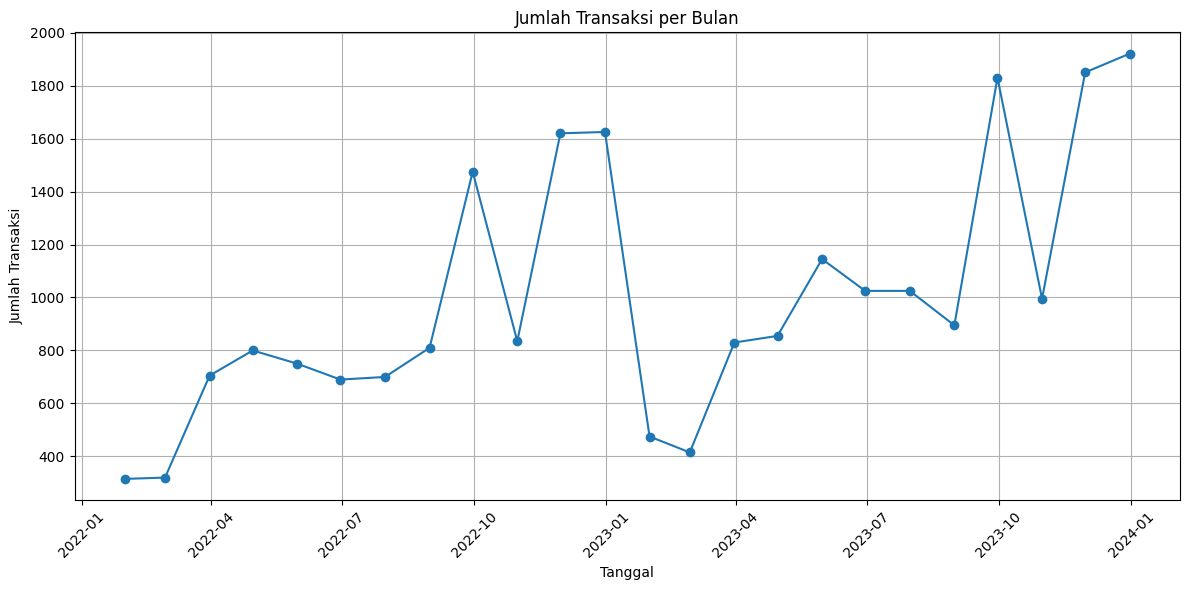

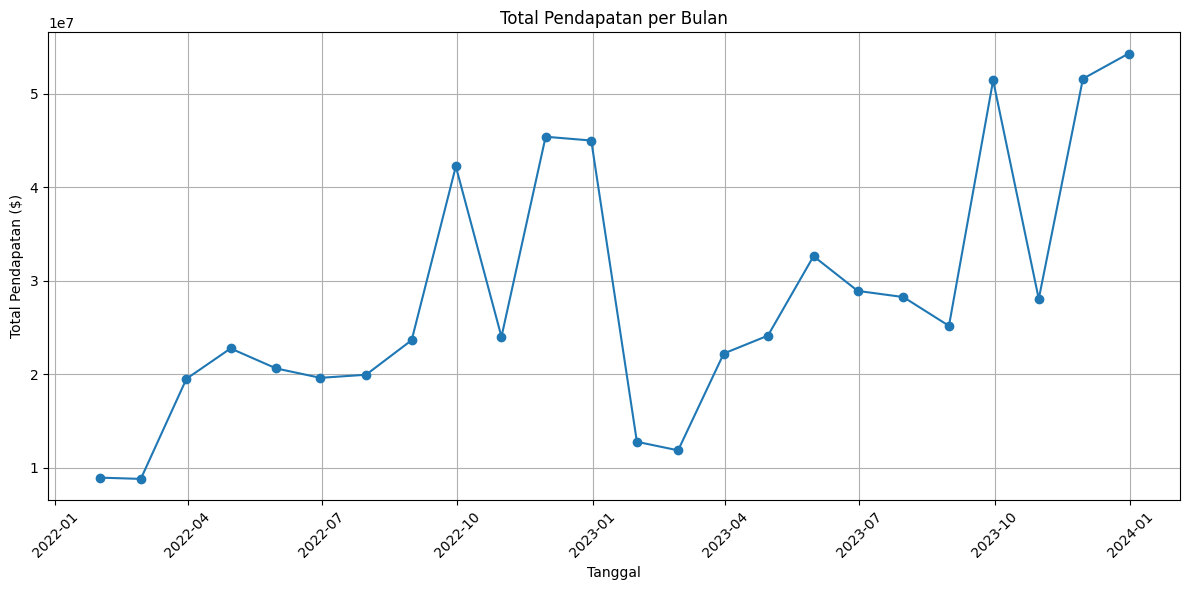

In [15]:
# Set kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)

# Agregasi jumlah transaksi per bulan
monthly_sales = df.resample('M').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_revenue = df['Price ($)'].resample('M').sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue, marker='o', linestyle='-')
plt.title('Total Pendapatan per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Make Model Prediction with ARIMA

#### Determine p, d and q variable

ADF Test for Monthly Data:
ADF Statistic: -2.685677
p-value: 0.076550
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307
Non-stationary


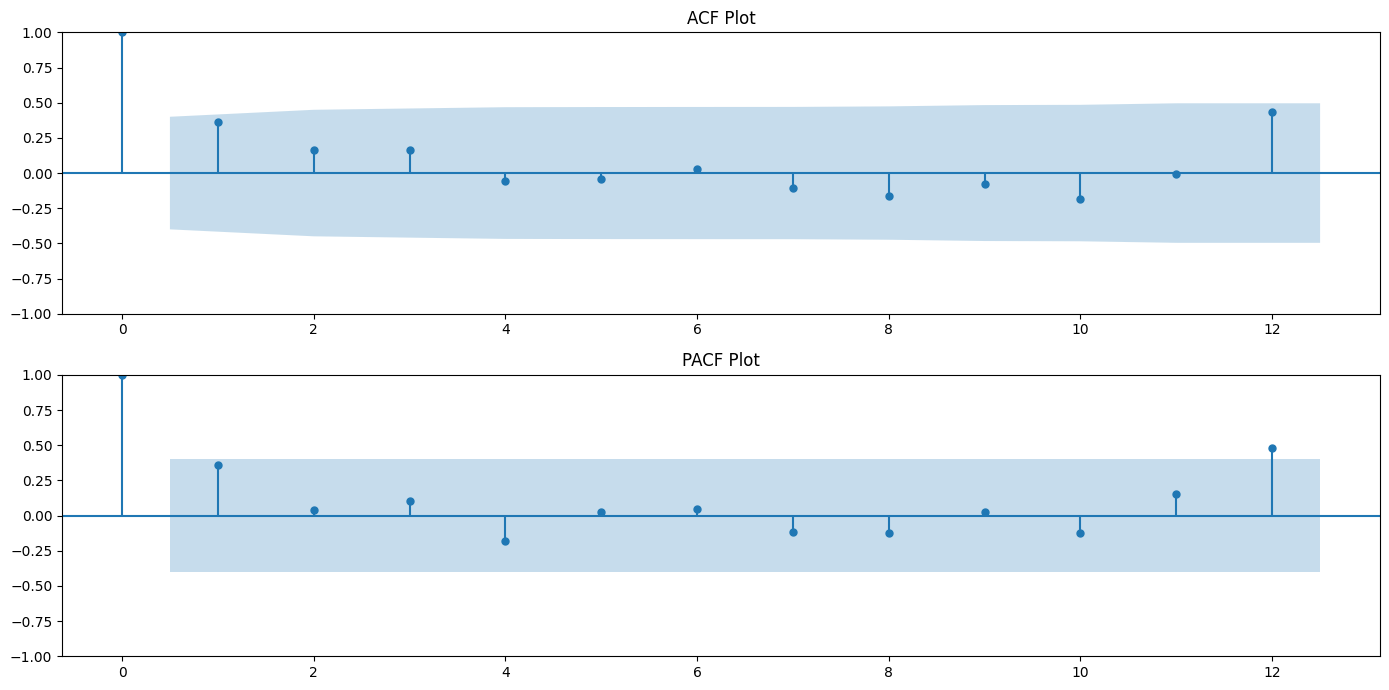

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Agregasi data menjadi bulanan
monthly_data = df['Price ($)'].resample('M').sum()

# Uji ADF untuk memeriksa kestasioneran data bulanan
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')

print("ADF Test for Monthly Data:")
adf_test(monthly_data)

# Plot ACF dan PACF untuk menentukan parameter p dan q
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(2, 1, 1)
plot_acf(monthly_data, lags=12, ax=plt.gca())
plt.title('ACF Plot')

# Plot PACF
plt.subplot(2, 1, 2)
plot_pacf(monthly_data, lags=12, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [17]:
# Fitting Arima Model (1, 0, 1) (2, 1. 4)
model = SARIMAX(monthly_data, order=(1, 0, 1), seasonal_order=(2, 1, 4, 12))
results = model.fit()
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                     Price ($)   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -198.910
Date:                                       Tue, 06 Aug 2024   AIC                            415.820
Time:                                               15:46:25   BIC                            420.184
Sample:                                           01-31-2022   HQIC                           414.204
                                                - 12-31-2023                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0819     

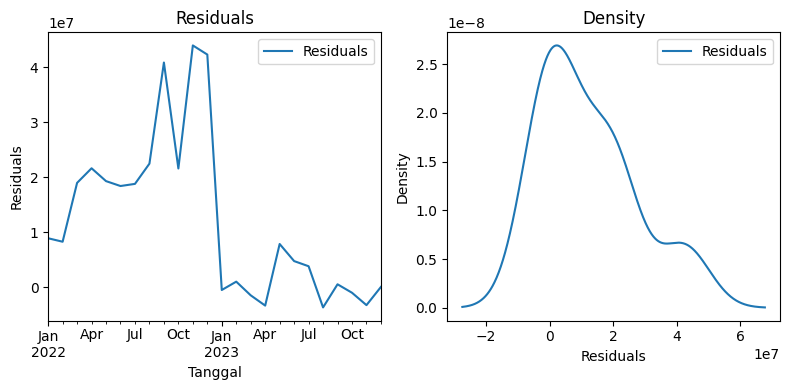

In [18]:
# Menghitung residuals dari model yang telah dilatih
residuals = results.resid

# Buat DataFrame untuk residuals
residuals_df = pd.DataFrame(residuals, columns=['Residuals'])

# Plot residual errors
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot residual errors
residuals_df.plot(title="Residuals", ax=ax[0])
ax[0].set_xlabel('Tanggal')
ax[0].set_ylabel('Residuals')

# Plot density plot dari residuals
residuals_df.plot(kind='kde', title='Density', ax=ax[1])
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

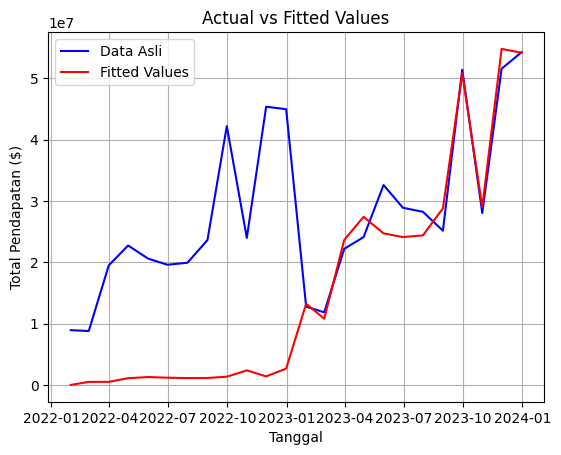

In [19]:
# Plot data asli
plt.plot(monthly_data, label='Data Asli', color='blue')

# Plot fitted values
plt.plot(results.fittedvalues, label='Fitted Values', color='red')

# Tambahkan judul dan label
plt.title('Actual vs Fitted Values')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan ($)')
plt.legend()
plt.grid(True)
plt.show()

#### Optimize ARIMA model using Out-of-Time Cross validation

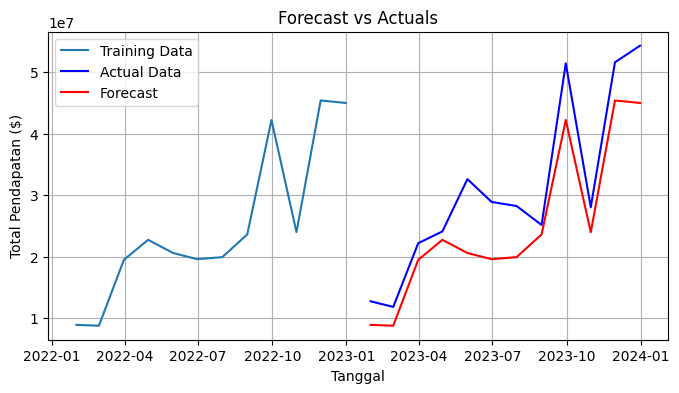

In [20]:
# Tentukan periode pelatihan dan pengujian
train_end = '2022-12-31'
test_start = '2023-01-01'
test_end = '2023-12-31'

# Pisahkan data
train_data = monthly_data[:train_end]
test_data = monthly_data[test_start:test_end]

# Latih model pada data pelatihan
model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(2, 1, 4, 12))
results = model.fit()

# Forecast pada data pengujian
forecast = results.get_forecast(steps=len(test_data))
forecast_index = test_data.index
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Buat DataFrame untuk forecast
fc_series = pd.Series(forecast_values, index=forecast_index)
lower_series = pd.Series(forecast_conf_int.iloc[:, 0], index=forecast_index)
upper_series = pd.Series(forecast_conf_int.iloc[:, 1], index=forecast_index)

# Plot Data Asli dan Forecast
plt.figure(figsize=(8, 4))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data', color='blue')
plt.plot(fc_series, label='Forecast', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan ($)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Fitting Arima Model (1, 0, 1) (2, 1. 4)
model = SARIMAX(monthly_data, order=(2, 1, 2), seasonal_order=(2, 1, 3, 12))
results = model.fit()
print(results.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                  Price ($)   No. Observations:                   24
Model:             SARIMAX(2, 1, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -181.960
Date:                                    Tue, 06 Aug 2024   AIC                            383.921
Time:                                            15:46:43   BIC                            387.900
Sample:                                        01-31-2022   HQIC                           381.413
                                             - 12-31-2023                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2502      9.852     -0.025      0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


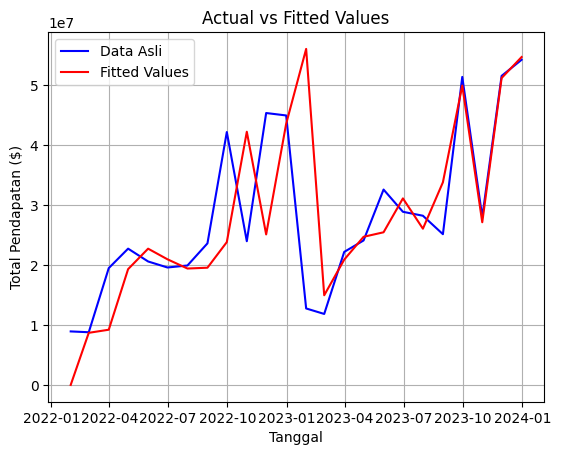

In [22]:
# Plot data asli
plt.plot(monthly_data, label='Data Asli', color='blue')

# Plot fitted values
plt.plot(results.fittedvalues, label='Fitted Values', color='red')

# Tambahkan judul dan label
plt.title('Actual vs Fitted Values')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan ($)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    # Menghitung metrik akurasi
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual)) * 100  # MAPE (%)
    me = np.mean(forecast - actual)                                    # ME
    mae = np.mean(np.abs(forecast - actual))                           # MAE
    mpe = np.mean((forecast - actual) / actual)                       # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))                 # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                        # Korelasi
    mins = np.amin(np.vstack([forecast, actual]), axis=0)              # Min
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)              # Max
    minmax = 1 - np.mean(mins / maxs)                                 # Min-Max Ratio
    acf1 = acf(actual - forecast, nlags=1)[1]                         # ACF1

    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'acf1': acf1,
        'corr': corr,
        'minmax': minmax
    }

# Contoh penggunaan
forecast_values = fc_series.values
actual_values = test_data.values

metrics = forecast_accuracy(forecast_values, actual_values)
print(metrics)

{'mape': 19.96633336950101, 'me': -5903731.249999997, 'mae': 5903731.249999997, 'mpe': -0.1996633336950101, 'rmse': 6837620.206258003, 'acf1': 0.001253635956827426, 'corr': 0.9725901855266885, 'minmax': 0.19966333369501}


In [24]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
data = df['Price ($)']

# Model Auto SARIMA
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # Uji ADF untuk menentukan 'd'
                      max_p=3, max_q=3, # Maksimum nilai p dan q
                      m=12,             # Frekuensi data (12 untuk data bulanan)
                      d=None,           # Biarkan model menentukan 'd'
                      seasonal=True,    # Menggunakan musiman
                      start_P=0,
                      D=1,
                      start_Q=0,
                      max_P=3,
                      max_D=1,
                      max_Q=3,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Ringkasan Model
print(model.summary())

# Forecasting
n_periods = 12  # Jumlah periode untuk forecasting
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plot hasil forecasting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data Asli')
plt.plot(pd.date_range(start=data.index[-1], periods=n_periods + 1, closed='right'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(start=data.index[-1], periods=n_periods + 1, closed='right'),
                 conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('Auto SARIMA Forecasting')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan ($)')
plt.legend()
plt.grid(True)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=543376.661, Time=11.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=543402.548, Time=5.36 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=537317.384, Time=42.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=75.64 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=543400.551, Time=1.72 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=543374.834, Time=3.64 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=535277.851, Time=34.27 sec
